In [2]:
import json
import glob
import os
import gzip
from pathlib import Path
import pickle

In [3]:
with open('reduced.pkl', 'rb') as f:
    unpickled = pickle.load(f)

In [5]:
unpickled.keys()

dict_keys(['recursions_per_trace', 'distinct_calls', 'vocab_counter', 'api_counter', 'calls_per_trace'])

In [7]:
api_counter = unpickled['api_counter']
recursions_per_trace = unpickled['recursions_per_trace']
vocab_counter = unpickled['vocab_counter']
distinct_calls = unpickled['distinct_calls']
calls_per_trace = unpickled['calls_per_trace']

In [8]:
sort_vocab = {k: v for k, v in sorted(vocab_counter.items(), key=lambda item: item[1])}

In [30]:
len(vocab_counter)

9292

In [33]:
vocab_counter

Counter({'[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder ': 1122,
         '[EXIT] ': 113402370,
         '[ENTRY] void ': 2061041,
         '': 81343110,
         '[ENTRY] org.junit.platform.engine.discovery.ClassSelector java.lang.Class ': 1067,
         '[ENTRY] java.lang.Object java.lang.Object|java.lang.String ': 903912,
         '[ENTRY] void boolean|java.lang.String ': 861078,
         '[ENTRY] void java.lang.Class ': 1011013,
         '[CALL] java.lang.Class getName  java.lang.String ': 1235049,
         '[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder org.junit.platform.engine.DiscoverySelector[] ': 1070,
         '[CALL] java.util.Arrays asList  java.util.List ': 594415,
         '[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder java.util.List ': 1095,
         '[CALL] java.util.List addAll  boolean ': 89403,
         '[ENTRY] java.util.Collection java.util.Collection|java.lang.String ': 1218,
        

In [40]:
import re

In [50]:
dict(filter(lambda elem: re.match("\[ENTRY\].*junit.*", elem[0]), vocab_counter.items()))

{'[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder ': 1122,
 '[ENTRY] org.junit.platform.engine.discovery.ClassSelector java.lang.Class ': 1067,
 '[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder org.junit.platform.engine.DiscoverySelector[] ': 1070,
 '[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder java.util.List ': 1095,
 '[ENTRY] org.junit.platform.launcher.core.LauncherDiscoveryRequestBuilder org.junit.platform.engine.Filter[] ': 1168,
 '[ENTRY] void org.junit.platform.engine.Filter ': 1236,
 '[ENTRY] org.junit.platform.launcher.LauncherDiscoveryRequest ': 1176,
 '[ENTRY] org.junit.platform.commons.logging.Logger java.lang.Class ': 12162,
 '[ENTRY] void java.util.List|java.util.List|java.util.List|java.util.List|org.junit.platform.launcher.core.LauncherConfigurationParameters ': 1244,
 '[ENTRY] org.junit.platform.launcher.TestPlan org.junit.platform.launcher.LauncherDiscoveryRequest ': 597,
 '[ENTRY] org.junit

In [9]:
from matplotlib import pyplot as plt

In [32]:
distinct_calls

Counter({'[CALL] java.lang.Class getName  java.lang.String ': 1235049,
         '[CALL] java.util.Arrays asList  java.util.List ': 594415,
         '[CALL] java.util.List addAll  boolean ': 89403,
         '[CALL] java.util.Collection forEach  void ': 4777,
         '[CALL] java.util.Arrays stream  java.util.stream.Stream ': 27769,
         '[CALL] java.util.stream.Stream forEach  void ': 9620,
         '[CALL] java.util.List add  boolean ': 652476,
         '[CALL] java.util.logging.Logger getLogger  java.util.logging.Logger ': 12642,
         '[CALL] java.lang.String trim  java.lang.String ': 2318456,
         '[CALL] java.lang.String isEmpty  boolean ': 134831,
         '[CALL] java.lang.ClassLoader getResources  java.util.Enumeration ': 2259,
         '[CALL] java.util.Collections list  java.util.ArrayList ': 1385,
         '[CALL] java.util.List isEmpty  boolean ': 114365,
         '[CALL] java.lang.Iterable iterator  java.util.Iterator ': 670263,
         '[CALL] java.util.Iterat

In [29]:
len(distinct_calls.keys()) # 230 distinct calls

1576

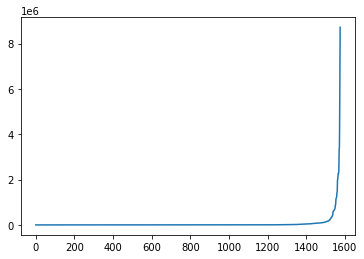

In [11]:
plt.plot({k: v for k, v in sorted(distinct_calls.items(), key=lambda item: item[1])}.values())

In [12]:
sort_vocab.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

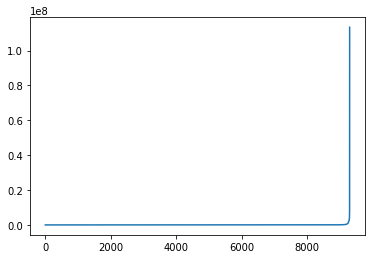

In [13]:
plt.plot(sort_vocab.values())

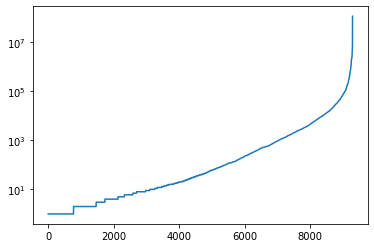

In [14]:
plt.semilogy(sort_vocab.values())#, title="Vocab frequency distribution (log scaled)")

In [18]:
from statistics import mean

## Do we have a useful Java-specific angle for the project?
We envision 2 usecases for this approach. Our approach captures the runtime behaviour of a piece of given Java code, and can therefore be used for:
* Clone detection: similar or identical pieces of code violate DRY principles. While state of the art NLM approaches such as CodeT5 do well, they lack understanding of runtime semantics.
* Code similarity calculation: Similar to the above task, our approach allows us to calculate how similar a given set of code is based on runtime behaviour. Our trace embedding approach allows us to cluster similar pieces of code in an n-dimensional space.

## What's the distribution of trace lengths i.e. calls? How long is the average trace? 

- are reflect calls being made by junit internally i.e. before test case runs? -> it seems so, I can gather more data
- stick to traces processable under 1hr each -> done
- find the root of the trace -> the root is when index == 0 
- more filtering (esp regarding junit) -> easy, drop traces that start with junit class name
- setup the model, train transformer
- is it meaningful to know how deep the call to java.util (eg) is? -> don't think so
- is stateformer useful for learning about program structure? eg how deep the call is
- diversity of data. revisit next week. -> much bigger
- log scale version, 95th percentile
conf Automated SE end April

347.3454357935794

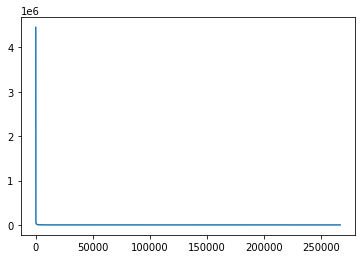

In [19]:
sorted_calls_per_trace = {k: v for k, v in sorted(calls_per_trace.items(), reverse=True, key=lambda item: item[1])}.values()
plt.plot(sorted_calls_per_trace)
mean(sorted_calls_per_trace)


## What's the distribution of distinct calls?

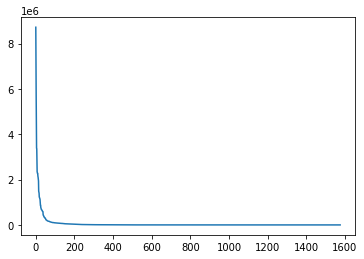

In [20]:
sorted_distinct = {k: v for k, v in sorted(distinct_calls.items(), reverse=True, key=lambda item: item[1])}.values()
plt.plot(sorted_distinct)


There are about 260 distinct calls (i.e. the exact FQN, arg types, and return types are identical). Exponential.

## What if we prune everything but the top 20%?

In [21]:
sum(list(sorted_distinct))

92616187

In [22]:
sum(list(sorted_distinct))*0.2 # 20% of the mass is located in values less than

18523237.400000002

In [34]:
sum(list(sorted_distinct)[:2])

15387358

We see that the top-3 make up almost 20% of the values.

## How many invocations does the average test case (the whole class) in our dataset make?

In [24]:
sorted_dumps_counter = {k: v for k, v in sorted(dump_counter.items(), reverse=True, key=lambda item: item[1])}.values()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.plot(sorted_dumps_counter)

NameError: name 'dump_counter' is not defined

In [ ]:

mean(sorted_dumps_counter)

This graph represents the number of traces per test case, which is equal to the number of method invocations per test case. The average test case makes 1486 method invocations.

## How deep does the average trace go?
This is counted by incrementing a counter per test case/method FQN each time an indexed trace is called.

In [25]:
for k in calls_per_trace.keys():
    if not k in recursions_per_trace:
        recursions_per_trace[k] = 0

15.54210841569332

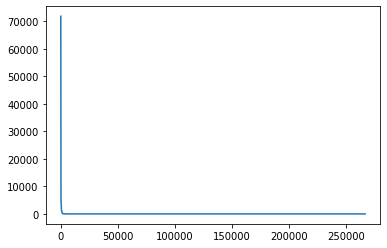

In [26]:
recursions_per_trace_counter = {k: v for k, v in sorted(recursions_per_trace.items(), reverse=True, key=lambda item: item[1])}.values()
ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
plt.plot(recursions_per_trace_counter)
from statistics import mean
mean(recursions_per_trace_counter)

The average trace has a very low depth. In fact, there are only 4 traced methods that refer to other traces i.e. are recursive. We believe this is due to the limited dev dataset.

## What is the namespace distribution of the calls?
How many are java.util, java.core etc

In [27]:
api_counter_sort = {k: v for k, v in sorted(api_counter.items(), reverse=True, key=lambda item: item[1])}
import itertools
api_counter_sorted = dict(itertools.islice(api_counter_sort.items(), 30))

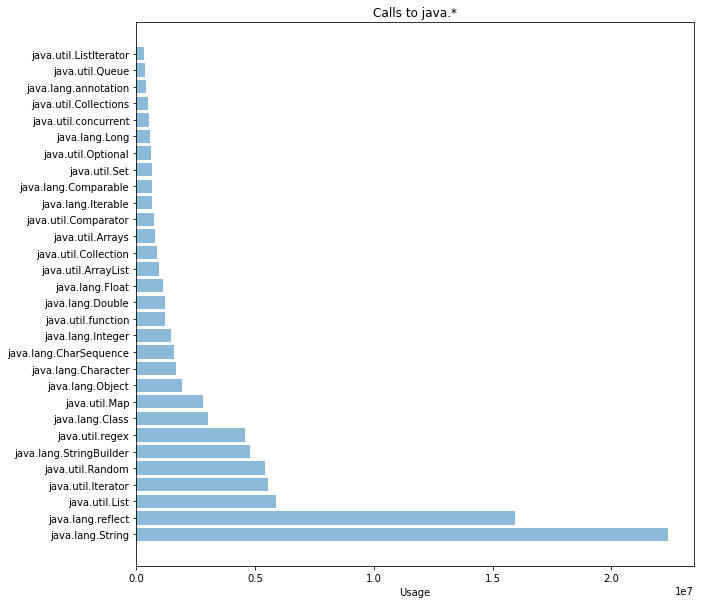

In [28]:
y_pos = range(0, len(api_counter_sorted))
fig = plt.figure(figsize=(10,10)) 
plt.barh(y_pos,api_counter_sorted.values(), align='center', alpha=0.5)
plt.yticks(y_pos, api_counter_sorted.keys())
plt.xlabel('Usage')
plt.title('Calls to java.*')

plt.show()

We see that the distribution quickly tapers off: the majority of calls to the java namespace are to a couple classes.

## Does it make sense to ignore traces with more than 100 calls or more than a depth of 100?
No, the majority of traces have well over 100 calls, and most are very shallow (<4).

## How many API calls are made along the way on average?
Given the very shallow depth of traces in this dataset, I have not analyzed the amount of calls along a recursive descent. Instead, I look at how many API calls are made per traced method.